# Задача 4. Многоклассовая классификация и множественная классификация/регрессия

* **Дедлайн**: 10.12.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [ ] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.


In [1360]:
# Импорты

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset

Набор данных из задания 2: [Car Price](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price)

Признаки:

| Наименование  | Описание |
| ------------- | ---------|
| car_ID | Индекс |
| symboling | Рейтинг страхового риска |
| CarName | Название модели |
| fueltype | Тип топлива |
| aspiration | Тип наддува |
| doornumber | Количество дверей |
| carbody | Тип кузова |
| drivewheel | Привод |
| enginelocation | Расположение двигателя |
| wheelbase | Колесная база |
| carlength | Длина автомобиля |
| carwidth | Ширина автомобиля |
| carheight | Высота автомобиля |
| curbweight | Снаряженная масса |
| enginetype | Тип двигателя |
| cylindernumber | Количество цилиндров |
| enginesize | Объем двигателя |
| fuelsystem | Топливная система |
| boreratio | Диаметр цилиндра |
| stroke | Ход поршня |
| compressionratio | Степень сжатия |
| horsepower | Мощность двигателя |
| peakrpm | Максимальное число об/мин |
| citympg | Расход топлива в городе |
| highwaympg | Расход топлива на трассе |
| price | Стоимость |

Будем предсказывать ценовую категорию автомобиля (преобразуем признак **price** в категориальный).

Чтение данных

In [1361]:
df = pd.read_csv('../data/car_price/car_price.csv')
df.shape

(205, 26)

In [1362]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

In [1363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1364]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Более подробный анализ признаков проведен в [задании 2](https://github.com/kolbacer/ml-course/blob/main/solutions/task02_linregr_gd.ipynb).

## Data cleaning & Feature engineering

Уберем лишний индекс

In [1365]:
df.drop(['car_ID'], axis=1, inplace=True)

Моделей автомобилей очень много, нам достаточно знать марку

In [1366]:
brand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, "brand", brand)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1367]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Некоторые модели дублируются. Объединим их.

In [1368]:
df["brand"].replace({'maxda': 'mazda', 
                     'porcshce': 'porsche',
                     'toyouta': 'toyota',
                     'Nissan': 'nissan',
                     'vokswagen': 'volkswagen', 
                     'vw': 'volkswagen'}, inplace=True)

df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Проверка на дубликаты

In [1369]:
df.loc[df.duplicated()]

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Проверка на пропущенные значения

In [1370]:
df.isnull().sum()

symboling           0
fueltype            0
brand               0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Оставим наиболее значимые признаки

In [1371]:
df_upd = df[['price', 'enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel',
             'curbweight','carlength','carwidth','enginesize','boreratio','horsepower','wheelbase']]
df_upd.head()

,price,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase
0,13495.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
1,16500.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
2,16500.0,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5
3,13950.0,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8
4,17450.0,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4


Преобразуем категориальные признаки

In [1372]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_upd = dummies('fueltype',df_upd)
df_upd = dummies('aspiration',df_upd)
df_upd = dummies('carbody',df_upd)
df_upd = dummies('drivewheel',df_upd)
df_upd = dummies('enginetype',df_upd)
df_upd = dummies('cylindernumber',df_upd)

In [1373]:
print(df_upd.columns.tolist())
df_upd.head()

['price', 'curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two']


,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,16500.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,16500.0,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,13950.0,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,17450.0,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False


### Преобразуем целевой признак
Разобьем автомобили на ценовые категории по стоимости:
- Бюджетные - до 10000<span>$</span>
- Средний класс - от 10000<span>$</span> до 20000<span>$</span>
- Люкс - от 20000<span>$</span>

Новый целевой признак, который будем предсказывать - **pricecategory**.

In [1374]:
pricecategory = pd.cut(df_upd['price'], [0, 10000, 20000, 100000], labels=['Budget','Medium','Highend'])
df_upd.insert(1, "pricecategory", pricecategory)
df_upd.drop(['price'], axis=1, inplace=True)
df_upd.head()

,pricecategory,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,Medium,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,Medium,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,Medium,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,Medium,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,Medium,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False


### Проанализируем соотношение классов

In [1375]:
df_upd['pricecategory'].value_counts()

pricecategory
Budget     100
Medium      79
Highend     26
Name: count, dtype: int64

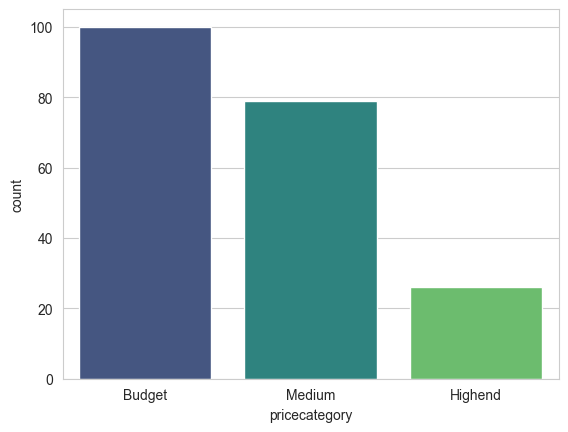

In [1376]:
sns.countplot(x="pricecategory", data=df_upd, palette='viridis')
plt.show()

Видим, что чем дороже автомобили, тем они реже встречаются. Учтем это при разбиении выборки на обучающую и тестовую.

Закодируем категории

In [1377]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

price_categories = df_upd['pricecategory']
df_upd['pricecategory'] = encoder.fit_transform(df_upd['pricecategory'])
classes = encoder.classes_
df_upd

,pricecategory,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,2,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,2,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,2,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,2,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2,2952,188.8,68.9,141,3.78,114,109.1,True,False,...,True,False,False,False,False,True,False,False,False,False
201,2,3049,188.8,68.8,141,3.78,160,109.1,True,True,...,True,False,False,False,False,True,False,False,False,False
202,1,3012,188.8,68.9,173,3.58,134,109.1,True,False,...,False,False,True,False,False,False,True,False,False,False
203,1,3217,188.8,68.9,145,3.01,106,109.1,False,True,...,True,False,False,False,False,False,True,False,False,False


### Проверим корелляцию

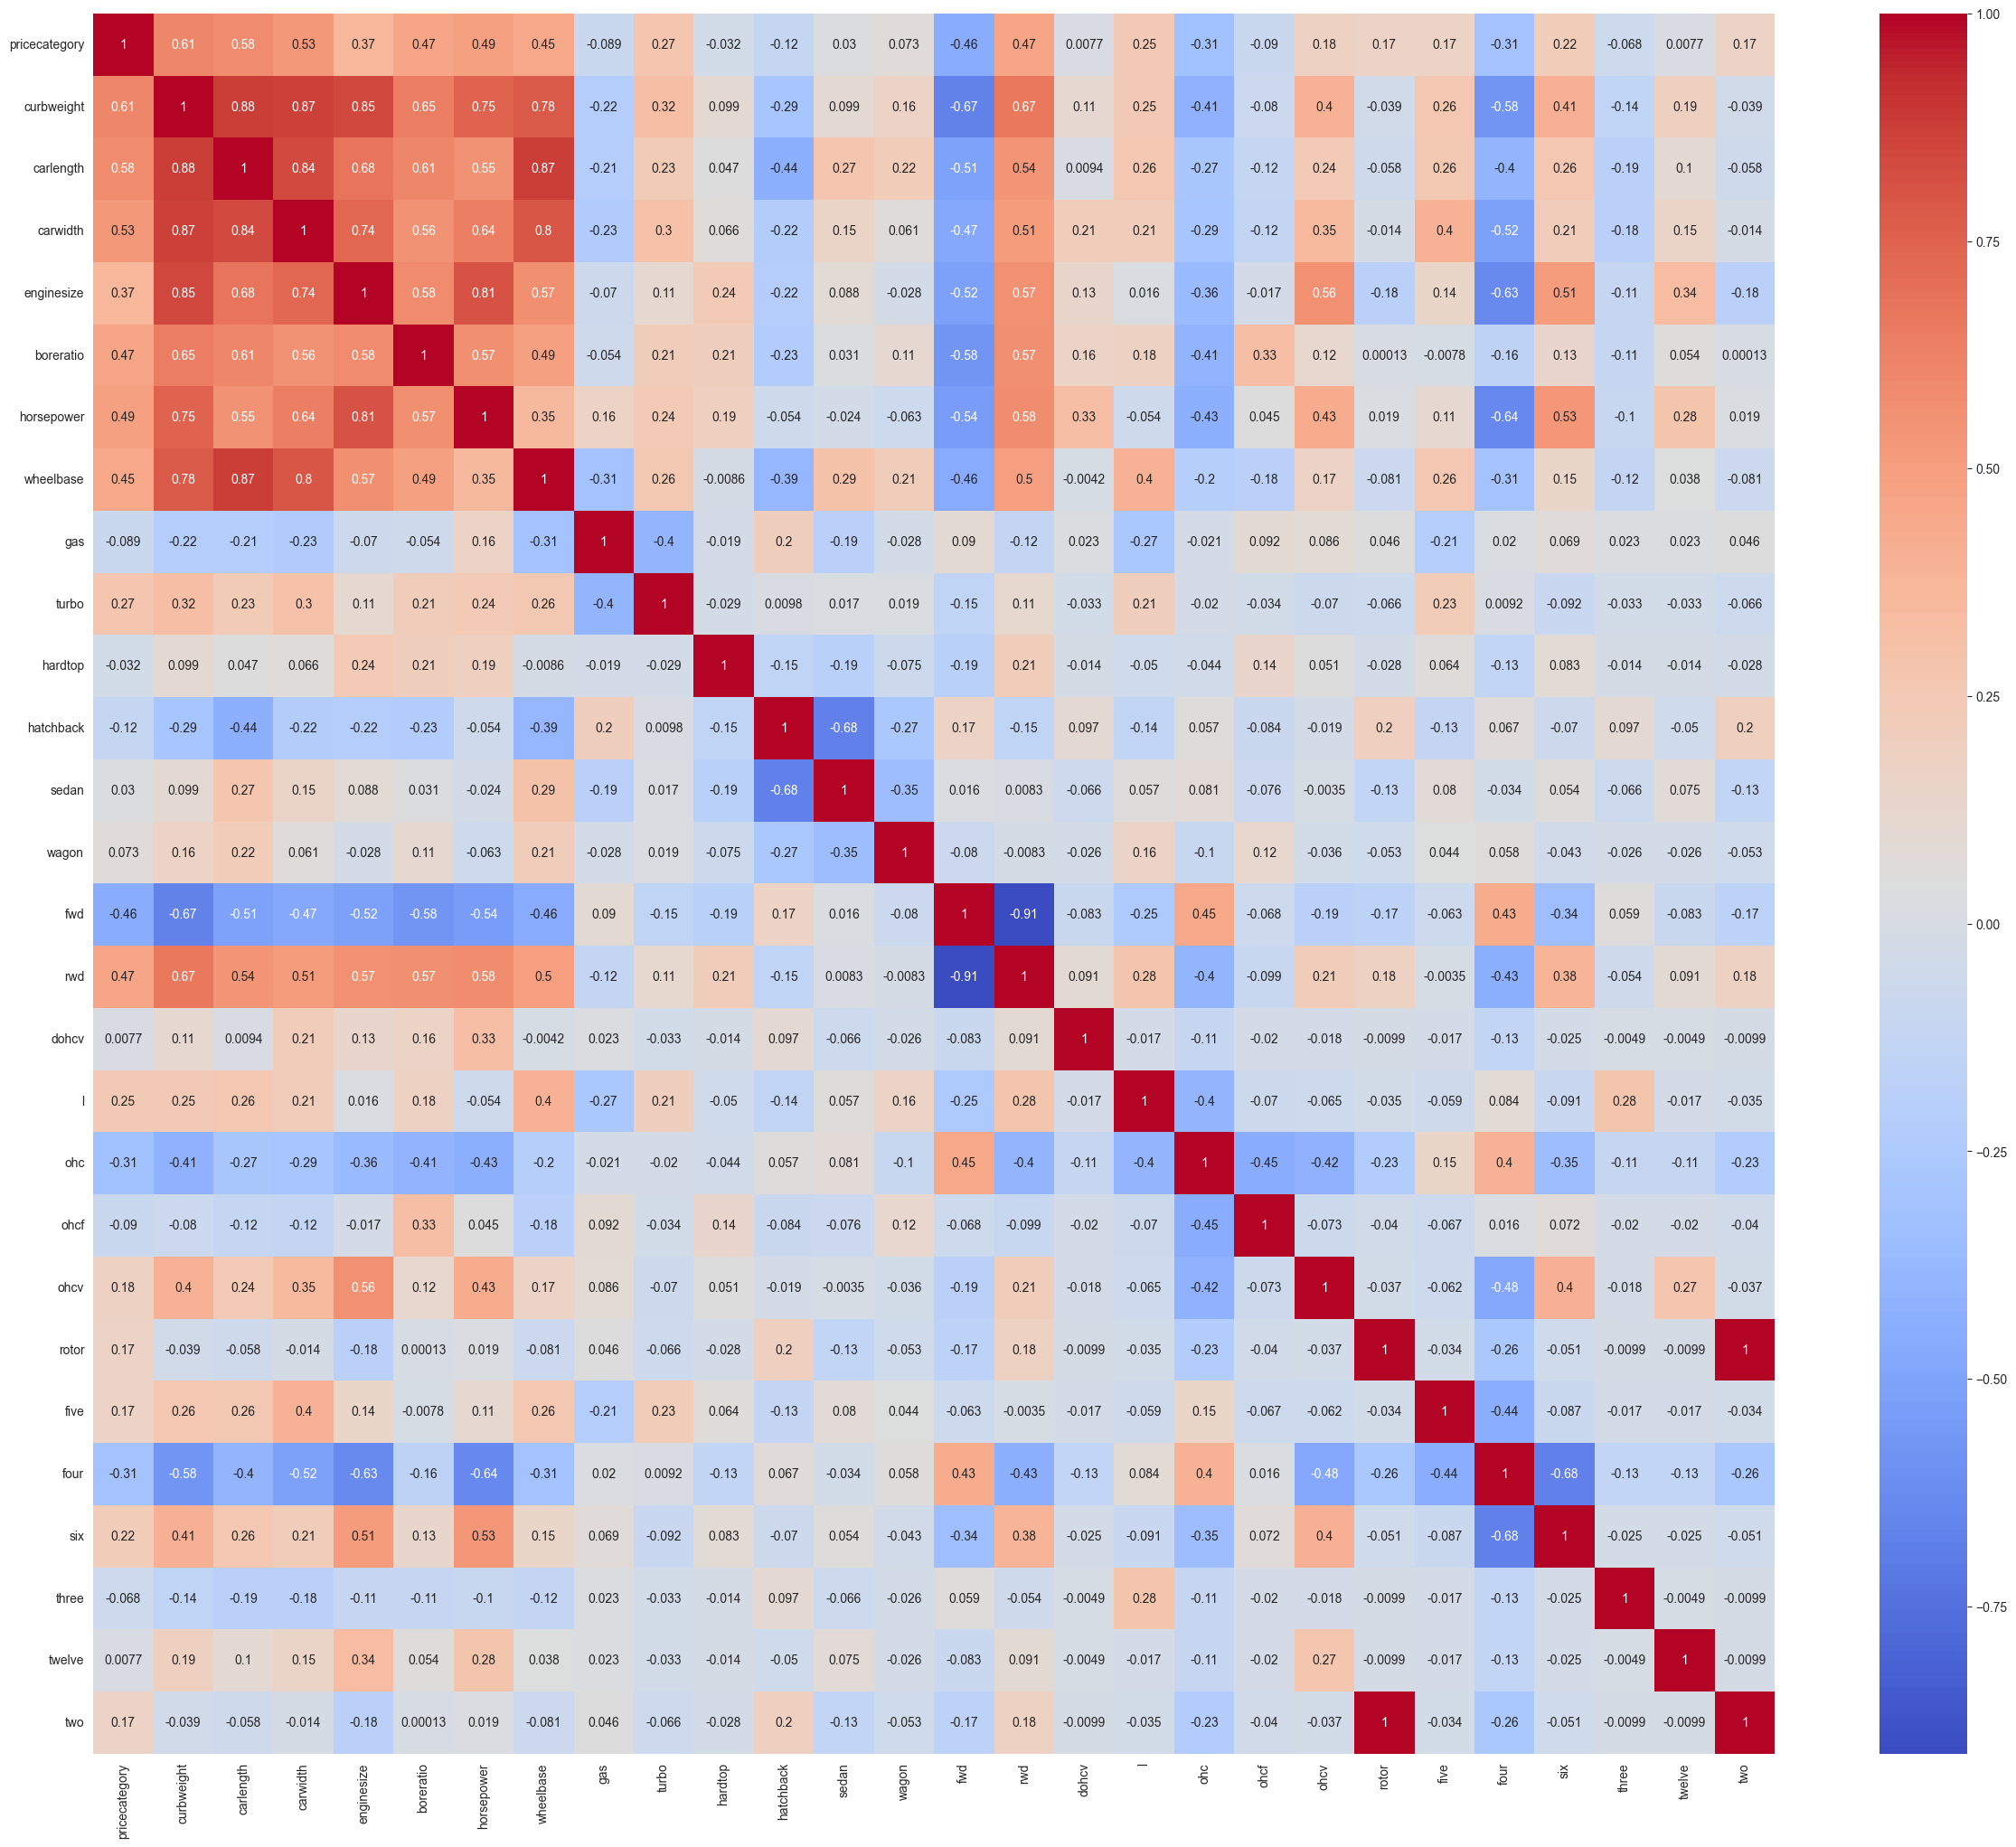

In [1378]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_upd.corr(), annot = True, cmap="coolwarm")
plt.show()

Как можно видеть, с целевым признаком сильно кореллируют *curbweight*, *carlength*, *carwidth*, *enginesize*, *horsepower* и некоторые классы из *drivewheel* и *cylindernumber*.

## Разбиение данных с использованием train_test_split и масштабирование

In [1379]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df_upd['pricecategory']
X = df_upd.drop(columns=['pricecategory'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=555)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

## Подбор оптимальных признаков (RFE)

In [1380]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifierCV

rfecv = RFECV(estimator=RidgeClassifierCV(), min_features_to_select=5)

rfecv.fit(X_train_scaled_df, y_train)

selected_features = list(X_train_scaled_df.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)

Optimal features:  25
Selected features:  ['curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two']


Удалим лишние признаки

In [1381]:
X_train_eliminated = X_train_scaled_df[selected_features]
X_test_eliminated = X_test_scaled_df[selected_features]

## Подбор оптимальных гиперпараметров и кросс-валидация

In [1382]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(5, shuffle=True, random_state=333)

### Logistic Regression

In [1383]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(LogisticRegression(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_logreg_c = searcher.best_params_["C"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 1000.0}
Optimal score = 0.8479166666666668


### K-Nearest Neighbour (KNN)

In [1384]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

searcher = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_n_neighbors = searcher.best_params_["n_neighbors"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'n_neighbors': 5}
Optimal score = 0.8289772727272726


### Support Vector Machine (SVM)

In [1385]:
from sklearn.svm import SVC

param_grid = {"kernel": ["linear", "rbf"],
              "C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "gamma": ["scale", "auto", 1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(SVC(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_kernel = searcher.best_params_["kernel"]
optimal_svm_c = searcher.best_params_["C"]
optimal_gamma = searcher.best_params_["gamma"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 0.25, 'gamma': 'scale', 'kernel': 'linear'}
Optimal score = 0.8354166666666668


### Naive Bayes

In [1386]:
from sklearn.naive_bayes import GaussianNB

param_grid = [{"var_smoothing": np.logspace(0, -10, num=100)}]

searcher = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_var_smoothing = searcher.best_params_["var_smoothing"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'var_smoothing': 1.0}
Optimal score = 0.7744318181818182


### Decision Tree

In [1387]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"criterion": ["gini", "entropy", "log_loss"],
               "splitter": ["best", "random"],
               "max_depth": [10, 20, 30],
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [2, 5, 10],
               "max_features": [2, 5, 10]}]

searcher = GridSearchCV(DecisionTreeClassifier(random_state=555), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_criterion = searcher.best_params_["criterion"]
optimal_splitter = searcher.best_params_["splitter"]
optimal_max_depth = searcher.best_params_["max_depth"]
optimal_min_samples_split = searcher.best_params_["min_samples_split"]
optimal_min_samples_leaf = searcher.best_params_["min_samples_leaf"]
optimal_max_features = searcher.best_params_["max_features"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Optimal score = 0.8541666666666667


## Тестирование обученных моделей

In [1388]:
from sklearn.model_selection import cross_validate

def measure_time(model, X, y):
    return cross_validate(model, X, y, cv=5)["fit_time"].mean()

accuracies = {}
times = {}

In [1389]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def plot_roc_curve(model, predict_func, classifier_title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        func = getattr(model, predict_func)
        fpr[i], tpr[i], _ = roc_curve([x == i for x in y_test], np.nan_to_num(func(X_test_eliminated)[:, i]))
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label=f'{classes[i]}-vs-rest (AUC = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_title} One-vs-Rest ROC curves')
    plt.legend(loc="lower right")
    plt.show()

## Стратегия **OneVsRest**

### LogisticRegression

OVR_LOGREG accuracy 0.8048780487804879
OVR_LOGREG time 0.03832745552062988


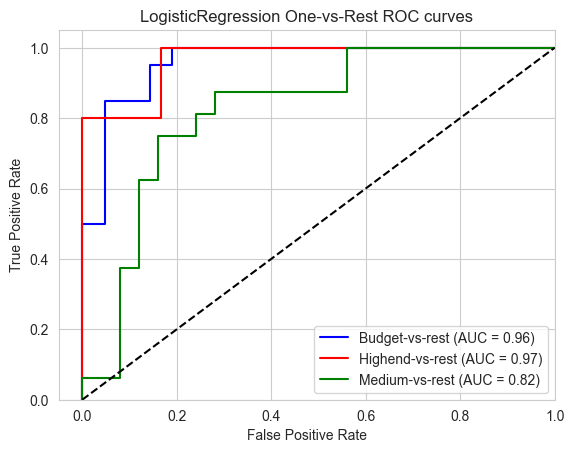

In [1390]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

ovr_logreg = OneVsRestClassifier(LogisticRegression(C=optimal_logreg_c, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovr_logreg.predict(X_test_eliminated))
time = measure_time(ovr_logreg, X_train_eliminated, y_train)

accuracies["OVR_LOGREG"] = accuracy
times["OVR_LOGREG"] = time

print(f"OVR_LOGREG accuracy {accuracy}")
print(f"OVR_LOGREG time {time}")

plot_roc_curve(ovr_logreg, "decision_function","LogisticRegression")

### K-Nearest Neighbour (KNN)

OVR_KNN accuracy 0.8048780487804879
OVR_KNN time 0.006409311294555664


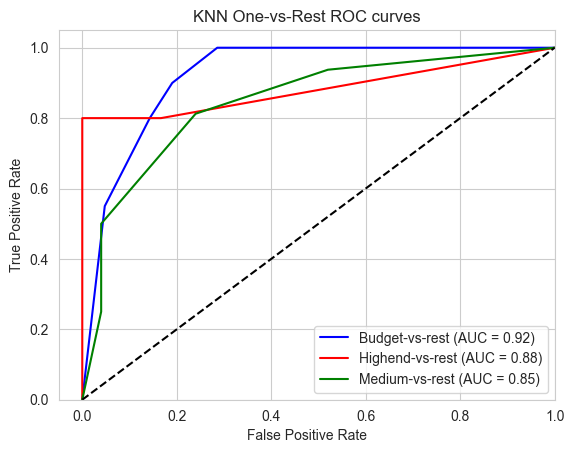

In [1391]:
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovr_knn.predict(X_test_eliminated))
time = measure_time(ovr_knn, X_train_eliminated, y_train)

accuracies["OVR_KNN"] = accuracy
times["OVR_KNN"] = time

print(f"OVR_KNN accuracy {accuracy}")
print(f"OVR_KNN time {time}")

plot_roc_curve(ovr_knn, "predict_proba","KNN")

### Support Vector Machine (SVM)

OVR_SVM accuracy 0.8292682926829268
OVR_SVM time 0.015304803848266602


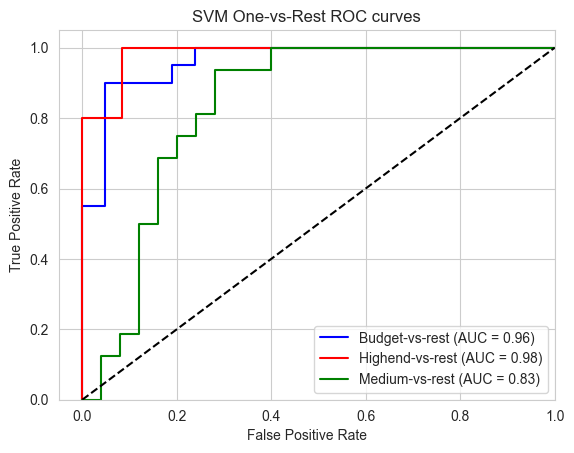

In [1392]:
ovr_svm = OneVsRestClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=777, probability=True)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovr_svm.predict(X_test_eliminated))
time = measure_time(ovr_svm, X_train_eliminated, y_train)

accuracies["OVR_SVM"] = accuracy
times["OVR_SVM"] = time

print(f"OVR_SVM accuracy {accuracy}")
print(f"OVR_SVM time {time}")

plot_roc_curve(ovr_svm, "decision_function","SVM")

### Naive Bayes

OVR_NB accuracy 0.7073170731707317
OVR_NB time 0.011517524719238281


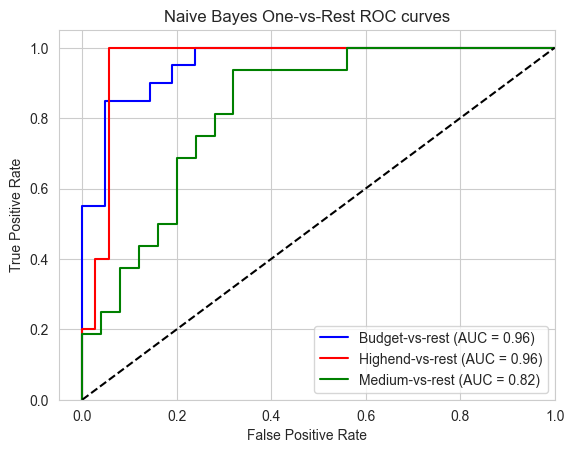

In [1393]:
ovr_nb = OneVsRestClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovr_nb.predict(X_test_eliminated))
time = measure_time(ovr_nb, X_train_eliminated, y_train)

accuracies["OVR_NB"] = accuracy
times["OVR_NB"] = time

print(f"OVR_NB accuracy {accuracy}")
print(f"OVR_NB time {time}")

plot_roc_curve(ovr_nb, "predict_proba","Naive Bayes")

### Decision Tree

OVR_DT accuracy 0.8292682926829268
OVR_DT time 0.007894945144653321


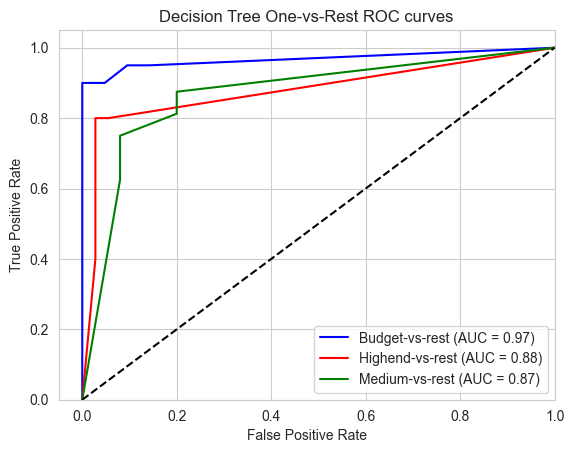

In [1394]:
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                    max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                    min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovr_dt.predict(X_test_eliminated))
time = measure_time(ovr_dt, X_train_eliminated, y_train)

accuracies["OVR_DT"] = accuracy
times["OVR_DT"] = time

print(f"OVR_DT accuracy {accuracy}")
print(f"OVR_DT time {time}")

plot_roc_curve(ovr_dt, "predict_proba","Decision Tree")

## Стратегия **OneVsOne**

### LogisticRegression

In [1395]:
from sklearn.multiclass import OneVsOneClassifier

ovo_logreg = OneVsOneClassifier(LogisticRegression(C=optimal_logreg_c, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovo_logreg.predict(X_test_eliminated))
time = measure_time(ovo_logreg, X_train_eliminated, y_train)

accuracies["OVO_LOGREG"] = accuracy
times["OVO_LOGREG"] = time

print(f"OVO_LOGREG accuracy {accuracy}")
print(f"OVO_LOGREG time {time}")

OVO_LOGREG accuracy 0.8536585365853658
OVO_LOGREG time 0.02518014907836914


### K-Nearest Neighbour (KNN)

In [1396]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovo_knn.predict(X_test_eliminated))
time = measure_time(ovo_knn, X_train_eliminated, y_train)

accuracies["OVO_KNN"] = accuracy
times["OVO_KNN"] = time

print(f"OVO_KNN accuracy {accuracy}")
print(f"OVO_KNN time {time}")

OVO_KNN accuracy 0.7804878048780488
OVO_KNN time 0.003801870346069336


### Support Vector Machine (SVM)

In [1397]:
ovo_svm = OneVsOneClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=777, probability=True)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovo_svm.predict(X_test_eliminated))
time = measure_time(ovo_svm, X_train_eliminated, y_train)

accuracies["OVO_SVM"] = accuracy
times["OVO_SVM"] = time

print(f"OVO_SVM accuracy {accuracy}")
print(f"OVO_SVM time {time}")

OVO_SVM accuracy 0.8292682926829268
OVO_SVM time 0.012000226974487304


### Naive Bayes

In [1398]:
ovo_nb = OneVsOneClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovo_nb.predict(X_test_eliminated))
time = measure_time(ovo_nb, X_train_eliminated, y_train)

accuracies["OVO_NB"] = accuracy
times["OVO_NB"] = time

print(f"OVO_NB accuracy {accuracy}")
print(f"OVO_NB time {time}")

OVO_NB accuracy 0.7073170731707317
OVO_NB time 0.0051994800567626955


### Decision Tree

In [1399]:
ovo_dt = OneVsOneClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                    max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                    min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, ovo_dt.predict(X_test_eliminated))
time = measure_time(ovo_dt, X_train_eliminated, y_train)

accuracies["OVO_DT"] = accuracy
times["OVO_DT"] = time

print(f"OVO_DT accuracy {accuracy}")
print(f"OVO_DT time {time}")

OVO_DT accuracy 0.8048780487804879
OVO_DT time 0.005200099945068359


## Стратегия **OutputCode**

### LogisticRegression

In [1400]:
from sklearn.multiclass import OutputCodeClassifier

oc_logreg = OutputCodeClassifier(LogisticRegression(C=optimal_logreg_c, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, oc_logreg.predict(X_test_eliminated))
time = measure_time(oc_logreg, X_train_eliminated, y_train)

accuracies["OC_LOGREG"] = accuracy
times["OC_LOGREG"] = time

print(f"OC_LOGREG accuracy {accuracy}")
print(f"OC_LOGREG time {time}")

OC_LOGREG accuracy 0.7560975609756098
OC_LOGREG time 0.038234376907348634


### K-Nearest Neighbour (KNN)

In [1401]:
oc_knn = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=optimal_n_neighbors)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, oc_knn.predict(X_test_eliminated))
time = measure_time(oc_knn, X_train_eliminated, y_train)

accuracies["OC_KNN"] = accuracy
times["OC_KNN"] = time

print(f"OC_KNN accuracy {accuracy}")
print(f"OC_KNN time {time}")

OC_KNN accuracy 0.7804878048780488
OC_KNN time 0.007398748397827148


### Support Vector Machine (SVM)

In [1402]:
oc_svm = OutputCodeClassifier(SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=777, probability=True)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, oc_svm.predict(X_test_eliminated))
time = measure_time(oc_svm, X_train_eliminated, y_train)

accuracies["OC_SVM"] = accuracy
times["OC_SVM"] = time

print(f"OC_SVM accuracy {accuracy}")
print(f"OC_SVM time {time}")

OC_SVM accuracy 0.7073170731707317
OC_SVM time 0.016211795806884765


### Naive Bayes

In [1403]:
oc_nb = OutputCodeClassifier(GaussianNB(var_smoothing=optimal_var_smoothing)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, oc_nb.predict(X_test_eliminated))
time = measure_time(oc_nb, X_train_eliminated, y_train)

accuracies["OC_NB"] = accuracy
times["OC_NB"] = time

print(f"OC_NB accuracy {accuracy}")
print(f"OC_NB time {time}")

OC_NB accuracy 0.7073170731707317
OC_NB time 0.007008075714111328


### Decision Tree

In [1404]:
oc_dt = OutputCodeClassifier(DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                                                    max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                                                    min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=777)).fit(X_train_eliminated, y_train)
accuracy = accuracy_score(y_test, oc_dt.predict(X_test_eliminated))
time = measure_time(oc_dt, X_train_eliminated, y_train)

accuracies["OC_DT"] = accuracy
times["OC_DT"] = time

print(f"OC_DT accuracy {accuracy}")
print(f"OC_DT time {time}")

OC_DT accuracy 0.7560975609756098
OC_DT time 0.009000587463378906


## Сравнение обученных моделей

In [1405]:
import itertools

models = [x.split('_')[1] for x in list(accuracies.keys())]
results = pd.DataFrame(accuracies.items(), columns=["model", "accuracy"])
results["model"] = models
results["time"] = list(times.values())
results["strategy"] = list(itertools.chain(*[["One-vs-Rest"] * 5, ["One-vs-One"] * 5, ["OutputCode"] * 5]))

### Точность

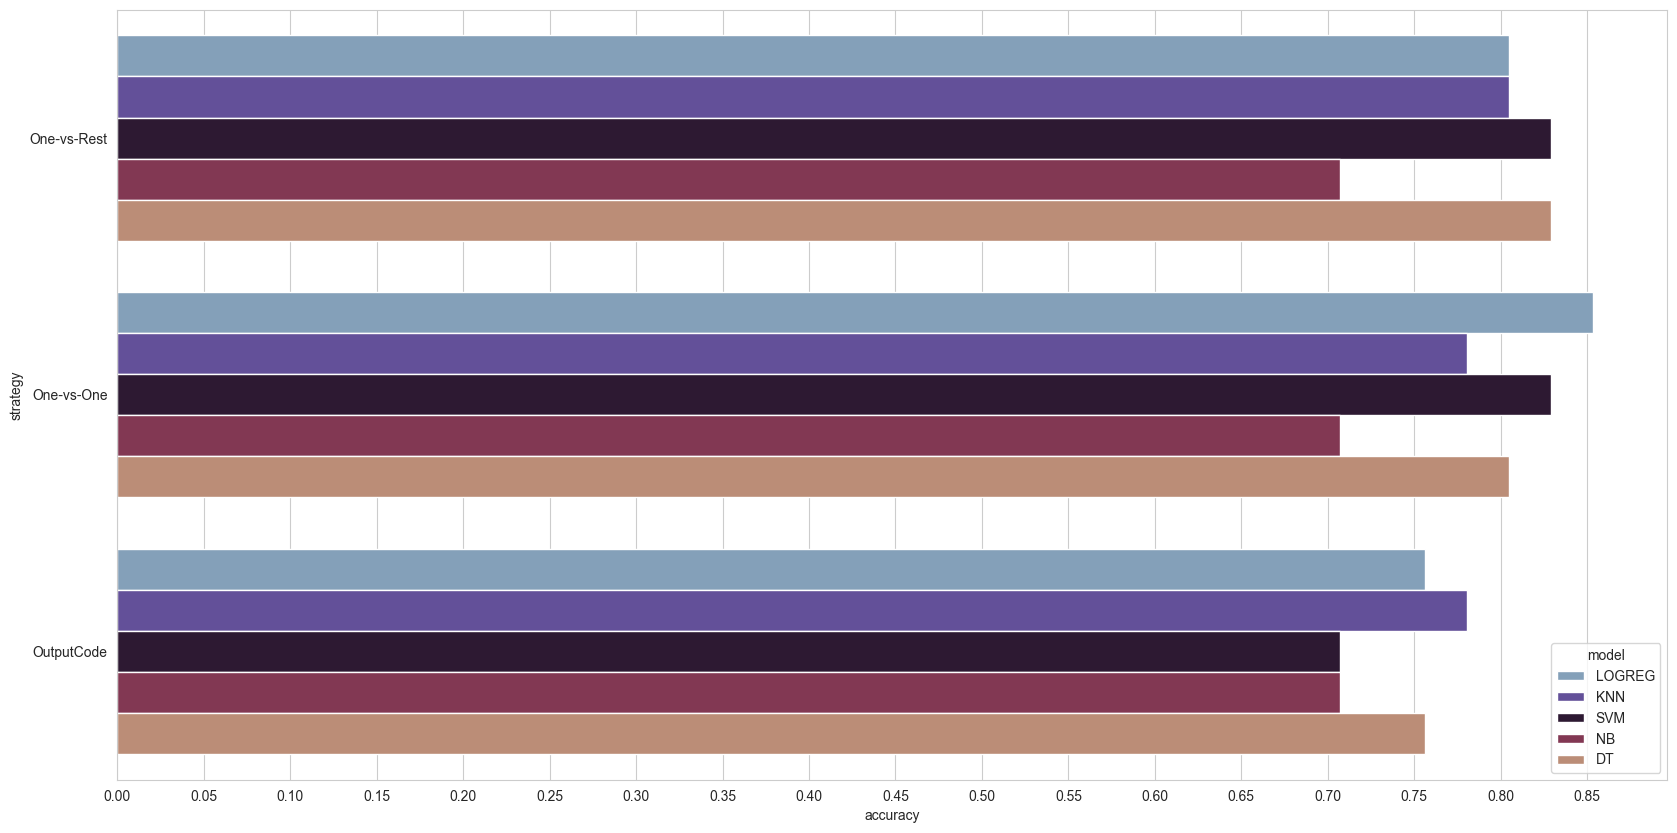

In [1406]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(0, 1.05, 0.05))
sns.barplot(data=results, x="accuracy", y="strategy", hue="model", palette="twilight")
plt.show()

### Время

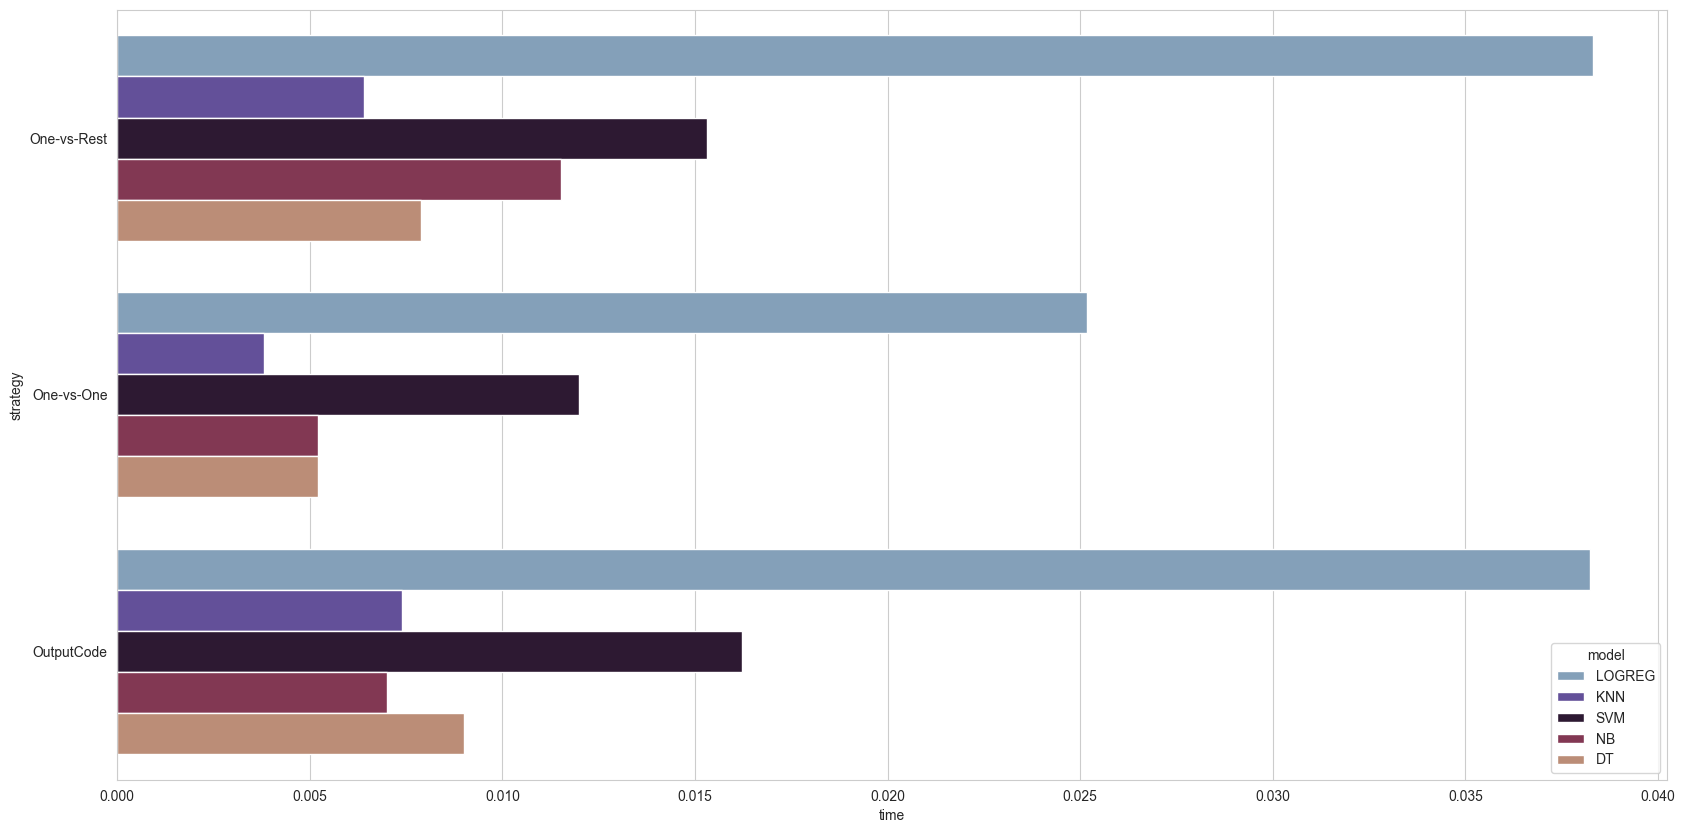

In [1408]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(0, 1.05, 0.005))
sns.barplot(data=results, x="time", y="strategy", hue="model", palette="twilight")
plt.show()

# Выводы

В среднем наилучшую точность показывают модели, обученные по стратегиям **One-vs-Rest** и **One-vs-One**. Менее точной оказалась **OutputCode**.
По времени исполнения быстрее всех оказалась стратегия **One-vs-One**. **One-vs-Rest** и **OutputCode** ведут себя по-разному в зависимости от выбранного классификатора.
Лучшую точность показывает модель, обученная с помощью логистической регрессии по стратегии **One-vs-One**, однако на нее затрачивается больше всего времени при любых стратегиях.
Худшую точность при любых стратегиях показывает модель, обученная наивным байесовским классификаторам, хотя для нее требуется немного времени.